In [2]:
# load, explore and plot data
import numpy as np
import pandas as pd
import re #for reducing noise of dataset;text reprocessing
import string #for text processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
#reading the given dataset
# data=pd.read_csv("spam.csv")
data= pd.read_csv('spam.csv' , encoding='latin-1' , sep = ",")


In [31]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [32]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [33]:
data.shape

(5572, 5)

In [34]:
#checking for null values
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [38]:
newdata=data.dropna()

In [39]:
#checking for duplicate values
newdata.duplicated().sum()

0

In [40]:
#drop duplicates
newdata = data.drop_duplicates()

In [41]:
newdata.duplicated().sum()

0

In [45]:
#plotting chart to check percentage distribution of target variable
newdata['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

In [46]:
newdata.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [43]:
plt.figure(figsize=(9, 5))

<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

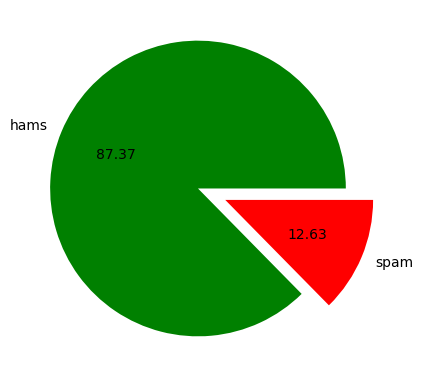

In [48]:
plt.pie(data['v1'].value_counts(),labels=['hams', 'spam'],autopct='%0.2f', colors=['Green', 'Red'], explode = [.1, .1])
plt.show()

In [50]:
newdata['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [51]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Oso
[nltk_data]     Shalom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
# For a number of characters

newdata['num_characters']=data['v2'].apply(len)
newdata.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [54]:
# For a number of words
from nltk.tokenize import word_tokenize
newdata['v2'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: v2, Length: 5169, dtype: object

In [56]:
newdata['num_words']=data['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
newdata.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15


In [57]:
# For a number of sentences

newdata['num_sentences']=newdata['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [58]:
newdata.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [59]:
# For Ham messages

newdata[newdata['v1']=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
# For Spam messages:

newdata[newdata['v2']=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


<Axes: xlabel='num_characters', ylabel='Count'>

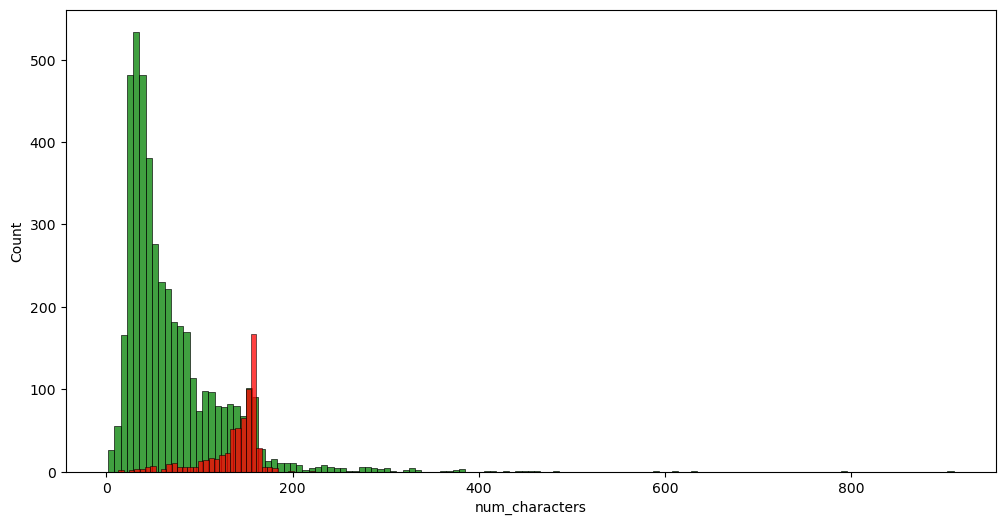

In [63]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(newdata[newdata['v1']=='ham']['num_characters'],color='green')
sns.histplot(newdata[newdata['v1']=='spam']['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

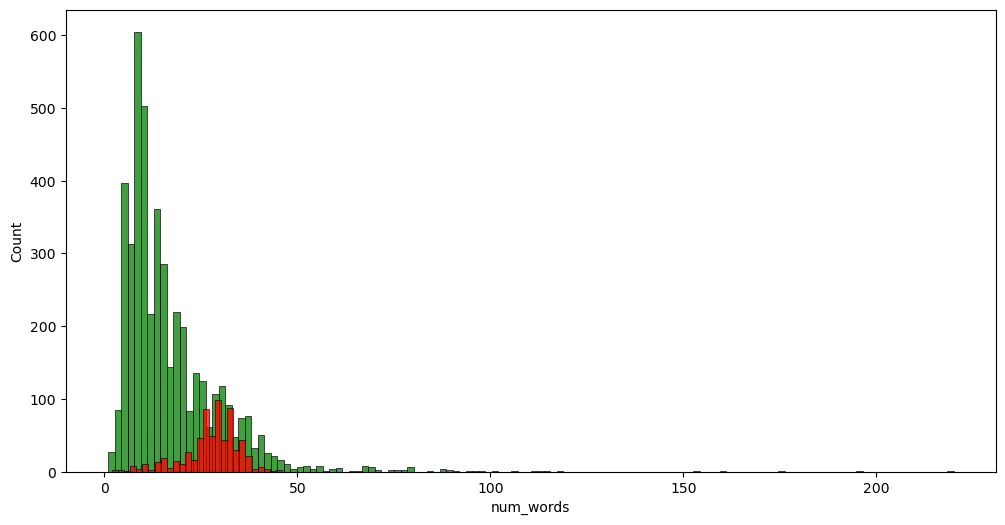

In [65]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(newdata[newdata['v1']=='ham']['num_words'],color='green')
sns.histplot(newdata[newdata['v1']=='spam']['num_words'],color='red')

In [66]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
from wordcloud import WordCloud

In [69]:
ham_msg_text = newdata[newdata.v1 == 'ham'].v2
spam_msg_text = newdata[newdata.v1 == 'spam'].v2

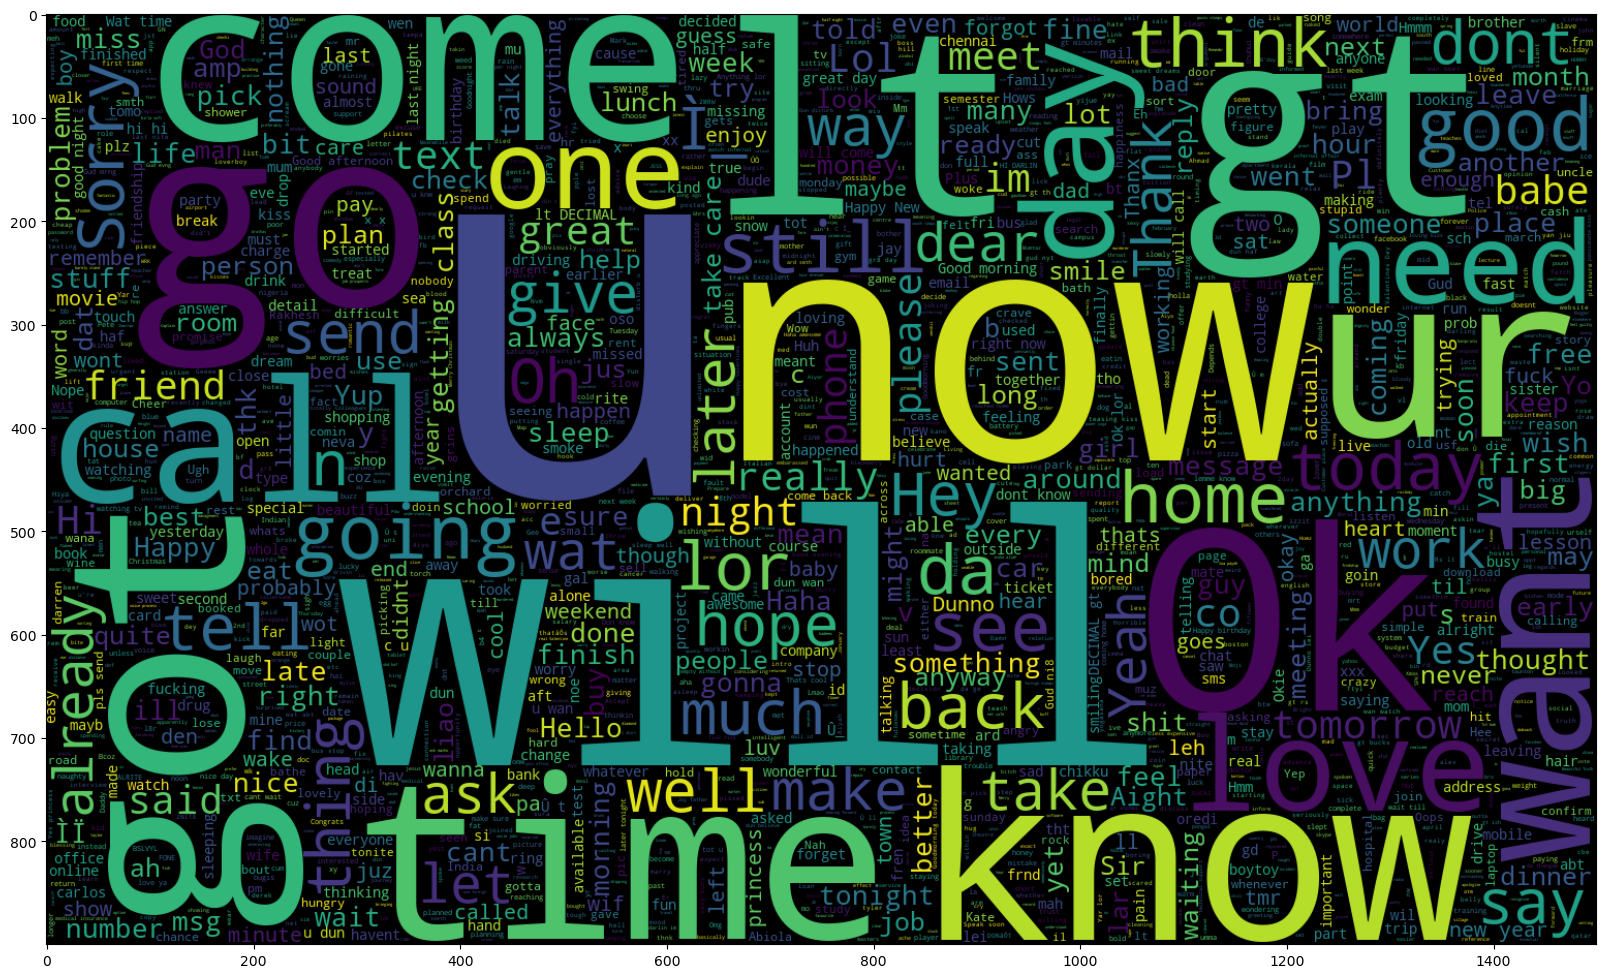

In [70]:
# Word Cloud for Ham MSGs

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(ham_msg_text))
plt.imshow(wc, interpolation='bilinear')

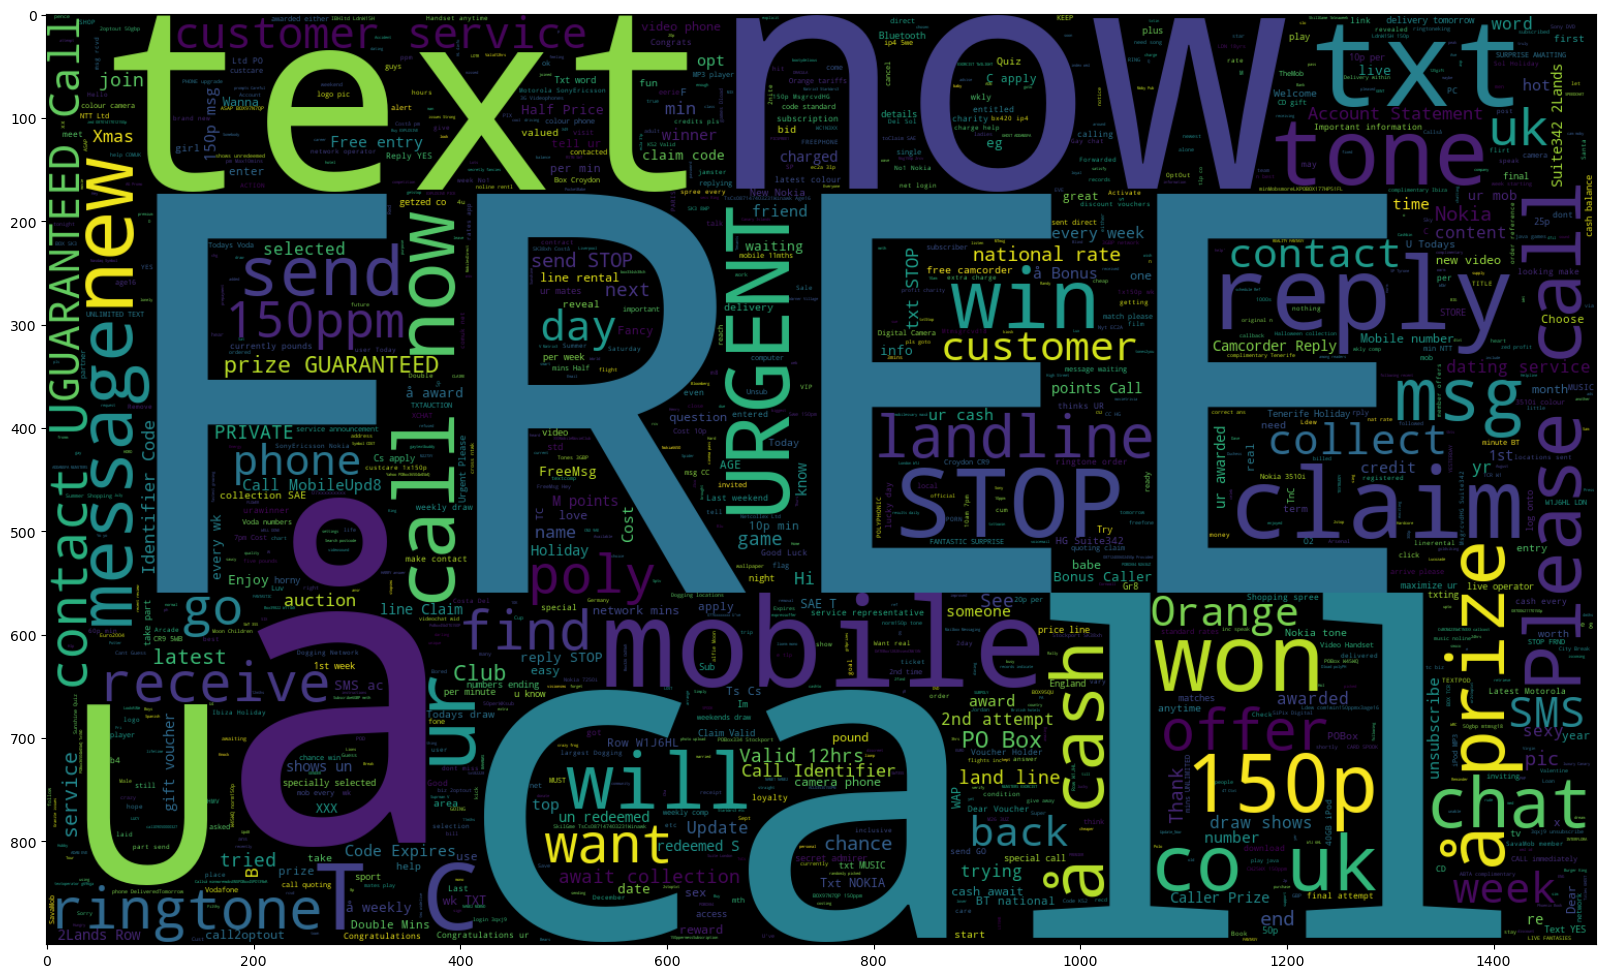

In [71]:
# Word Cloud for Spam MSGs

plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(spam_msg_text))
plt.imshow(wc, interpolation='bilinear')

In [72]:
u = newdata['v2'][3]
u

'U dun say so early hor... U c already then say...'

In [73]:
v = newdata['v2'][8]
v

'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [74]:
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [75]:
newdata['v2'] = newdata['v2'].apply(remove_punc)

In [76]:
newdata['v2'][8]

'WINNER As a valued network customer you have been selected to receivea å£900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only'

In [77]:
def remove_noise(text):
  t = re.sub('[^a-zA-Z]', ' ', text)
  return t

In [78]:
newdata['v2'] = newdata['v2'].apply(remove_noise)

In [79]:
newdata['v2'][8]

'WINNER As a valued network customer you have been selected to receivea       prize reward To claim call             Claim code KL    Valid    hours only'

In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Oso
[nltk_data]     Shalom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [82]:
len(sw)

179

In [83]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [84]:
newdata['v2'] = newdata['v2'].apply(remove_sws)

In [85]:
newdata['v2'][8]

'winner valued network customer selected receivea prize reward claim call claim code kl valid hours'

In [86]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Oso
[nltk_data]     Shalom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Oso
[nltk_data]     Shalom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Oso
[nltk_data]     Shalom\AppData\Roaming\nltk_data...


True

In [87]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [88]:
newdata['v2']= newdata['v2'].apply(lemma)

In [89]:
newdata.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,ham,go jurong point crazy available bugis n great ...,NaN,NaN,NaN,111,24,2
1,ham,ok lar joking wif u oni,NaN,NaN,NaN,29,8,2
2,spam,free entry wkly comp win fa cup final tkts st ...,NaN,NaN,NaN,155,37,2
3,ham,u dun say early hor u c already say,NaN,NaN,NaN,49,13,1
4,ham,nah dont think go usf life around though,NaN,NaN,NaN,61,15,1


In [90]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

newdata['v1']=encoder.fit_transform(newdata['v1'])

In [91]:
newdata.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,go jurong point crazy available bugis n great ...,NaN,NaN,NaN,111,24,2
1,0,ok lar joking wif u oni,NaN,NaN,NaN,29,8,2
2,1,free entry wkly comp win fa cup final tkts st ...,NaN,NaN,NaN,155,37,2
3,0,u dun say early hor u c already say,NaN,NaN,NaN,49,13,1
4,0,nah dont think go usf life around though,NaN,NaN,NaN,61,15,1


In [92]:
newdata = newdata[['v1','v2']]

In [93]:
newdata.head()

,v1,v2
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [95]:
X = tf.fit_transform(newdata['v2']).toarray()
y = newdata['v1']

In [96]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int32

In [98]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

In [100]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [101]:
# Create the instance of Naive Bayes
clf = BernoulliNB()

In [102]:
# Fit the data
clf.fit(X_train, y_train)

BernoulliNB()

In [103]:
# Making prediction
y_pred = clf.predict(X_test)

In [104]:
# Evaluation
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9816247582205029


In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       921
           1       0.97      0.86      0.91       113

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



Text(120.72222222222221, 0.5, 'Truth')

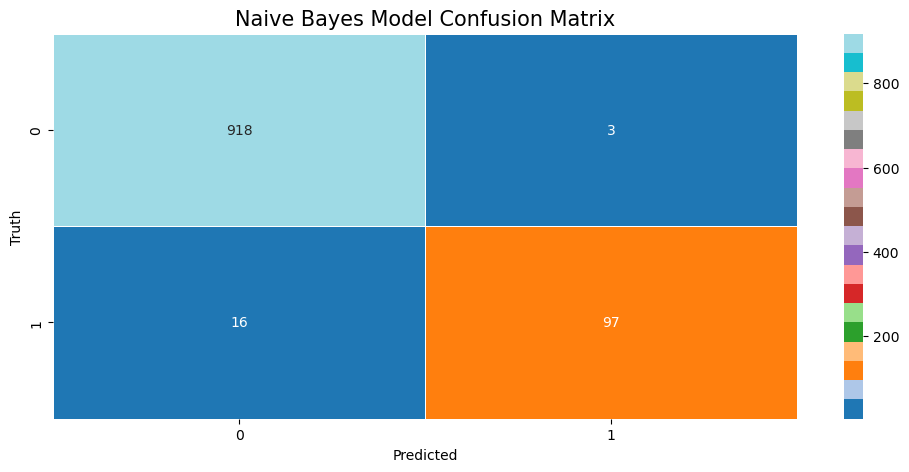

In [106]:
# Plot the Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Naive Bayes Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [107]:
#***Finally, After a lot of experiments and improvement, we have trained our model to get an Accuracy score of 98% 
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [109]:
# Create the instance of logistic regression
lr = LogisticRegression()
# Fit the data
lr.fit(X_train, y_train)



LogisticRegression()

In [110]:
sv =SVC()
# Fit the data
sv.fit(X_train, y_train)

SVC()

In [111]:
# Making prediction for logistic regression and svc
y_pred_lr = lr.predict(X_test)

y_pred_sv = sv.predict(X_test)

In [112]:
# Evaluation for logistic regression and svc
print("Accuracy Score: ", accuracy_score(y_test, y_pred_lr))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_sv))

Accuracy Score:  0.9680851063829787
Accuracy Score:  0.9835589941972921


In [114]:
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       921
           1       0.99      0.72      0.83       113

    accuracy                           0.97      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.97      0.97      1034

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       921
           1       0.99      0.86      0.92       113

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



Text(120.72222222222221, 0.5, 'Truth')

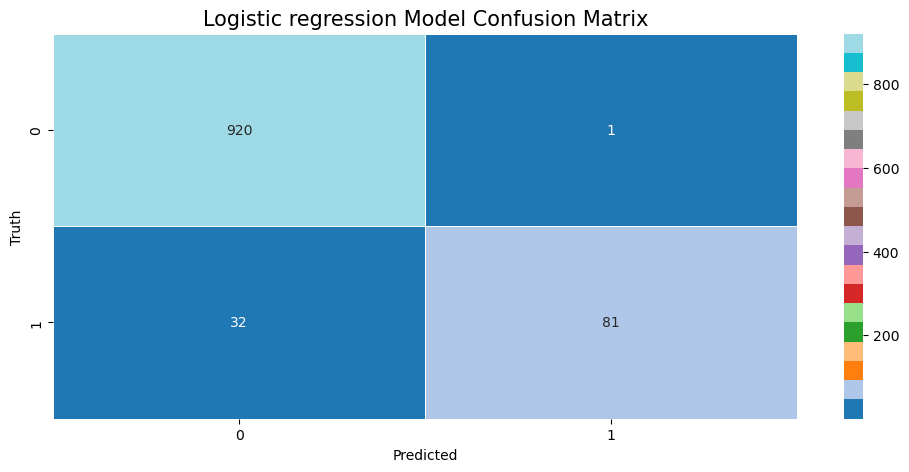

In [115]:
# Plot the Confusion Matrix for logisticc regression

import seaborn as sn
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Logistic regression Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(120.72222222222221, 0.5, 'Truth')

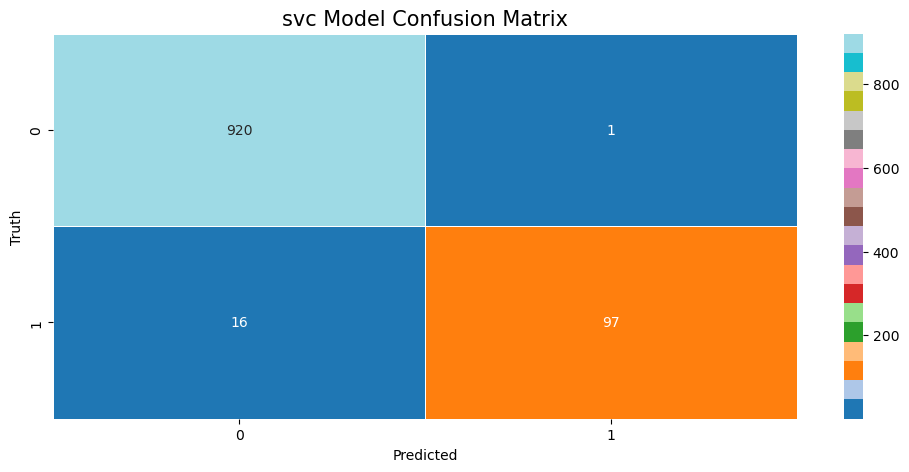

In [116]:
# Plot the Confusion Matrix for svc

import seaborn as sn
cm = confusion_matrix(y_test, y_pred_sv)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('svc Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [117]:
pickle.dump(lr,open('model1.pkl','wb'))
pickle.dump(sv,open('model2.pkl','wb'))

In [118]:
import pickle
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))
model1 = pickle.load(open('model1.pkl', 'rb'))
model2 = pickle.load(open('model2.pkl', 'rb'))
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)



[nltk_data] Downloading package stopwords to C:\Users\Oso
[nltk_data]     Shalom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Oso
[nltk_data]     Shalom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Oso
[nltk_data]     Shalom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
input_message = "Congratulations! You have won a free ticket to Bahamas. Call now to claim your prize"

transformed_message = transform_text(input_message)

vectorized_input = vectorizer.transform([transformed_message])

prediction = model.predict(vectorized_input)[0]
prediction1 = model1.predict(vectorized_input)[0]


result = 'Spam' if prediction == 1 else 'Not Spam'
result1 = 'Spam' if prediction1 == 1 else 'Not Spam'

print(f"The message is: {result} according to Naive Bayes model")
print(f"The message is: {result1} according to Linear Regression  model")


The message is: Spam according to Naive Bayes model
The message is: Spam according to Linear Regression  model


In [129]:

input_message = "I HAVE A DATE ON SUNDAY WITH WILL!!"

transformed_message = transform_text(input_message)

vectorized_input = vectorizer.transform([transformed_message])

prediction = model.predict(vectorized_input)[0]
prediction1 = model1.predict(vectorized_input)[0]



result = 'Spam' if prediction == 1 else 'Not Spam'
result1 = 'Spam' if prediction1 == 1 else 'Not Spam'

print(f"The message is: {result} according to Naive Bayes model")
print(f"The message is: {result1} according to Linear Regression  model")


The message is: Not Spam according to Naive Bayes model
The message is: Not Spam according to Linear Regression  model
